In [9]:
pip install openpyxl


     |████████████████████████████████| 249 kB 18.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [11]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?
df = pd.read_excel('datasets/flight_price.xlsx')
df.head()
dimensions = df.shape
print(f"The dataset has {dimensions[0]} rows and {dimensions[1]} columns.")

The dataset has 10683 rows and 11 columns.


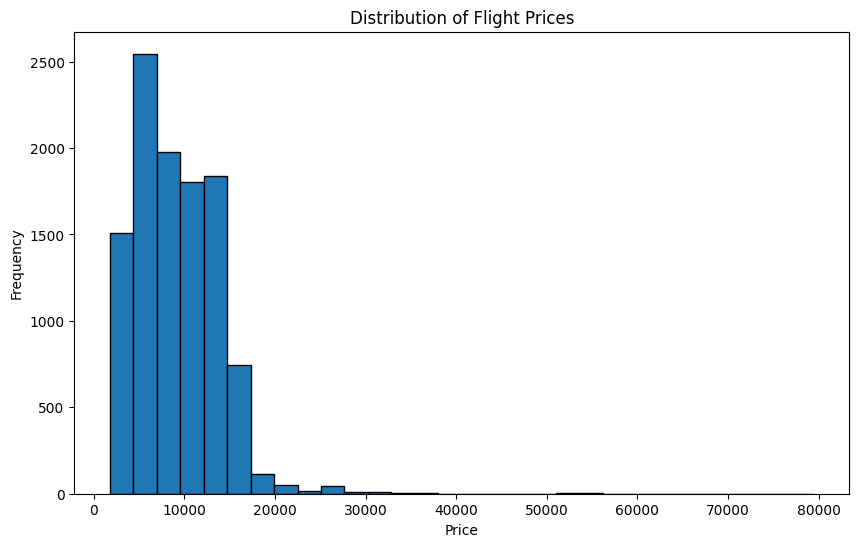

In [12]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Q3 What is the range of prices in the dataset? What is the minimum and maximum price?
min_price = df['Price'].min()
max_price = df['Price'].max()

print(f"The minimum price is {min_price}")
print(f"The maximum price is {max_price}")


The minimum price is 1759
The maximum price is 79512


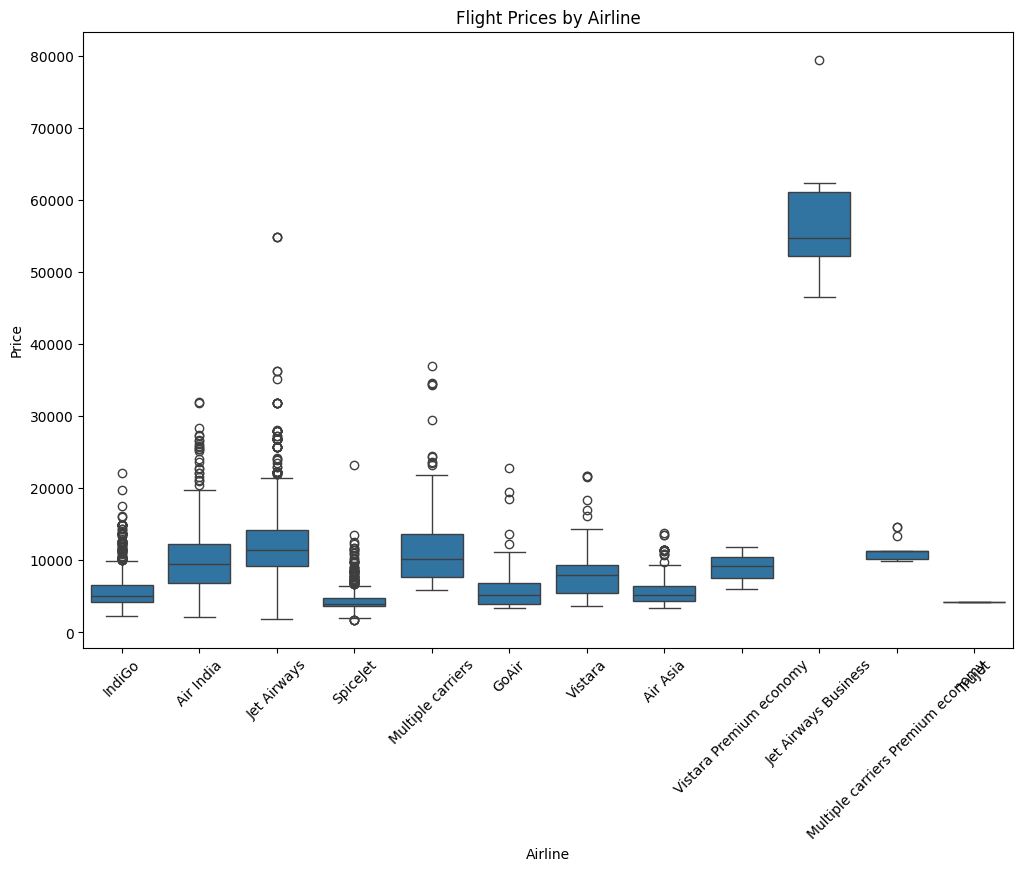

In [15]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


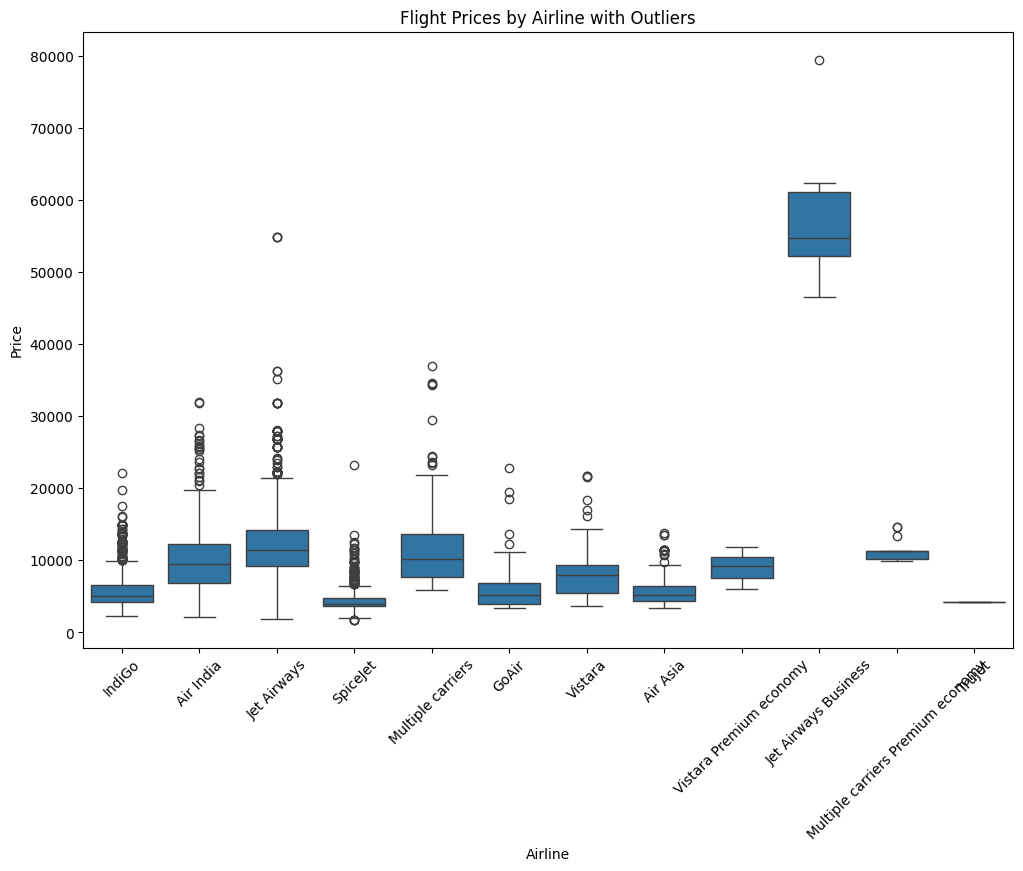

Number of potential outliers: 94
               Airline Date_of_Journey    Source Destination  \
123          Air India       1/03/2019     Delhi      Cochin   
396  Multiple carriers       1/03/2019     Delhi      Cochin   
486        Jet Airways      01/03/2019  Banglore   New Delhi   
510        Jet Airways      01/03/2019  Banglore   New Delhi   
597          Air India       6/03/2019    Mumbai   Hyderabad   

                     Route Dep_Time  Arrival_Time Duration Total_Stops  \
123        DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   
396        DEL → BOM → COK    12:50         19:15   6h 25m      1 stop   
486        BLR → BOM → DEL    08:55         15:15   6h 20m      1 stop   
510        BLR → BOM → DEL    07:00         12:25   5h 25m      1 stop   
597  BOM → JDH → DEL → HYD    09:40  15:15 07 Mar  29h 35m     2 stops   

    Additional_Info  Price  
123         No info  27430  
396         No info  36983  
486         No info  26890  
510         No info  

In [16]:
# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

# Plot the boxplot to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline with Outliers')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Identifying outliers in the dataset
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print(f"Number of potential outliers: {outliers.shape[0]}")

# Displaying some of the outliers
print(outliers.head())
